### Economic Data Analysis with Fred & Pandas


In [270]:
!pip install fredapi 
!pip install plotly

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns",500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = "8c51c53fe38c412dd8e1564cbc357eff"

### 1. Create the Fred Object 

In [273]:
fred= Fred(api_key=fred_key)

### 2. Search for economic data

In [275]:
sp_search=fred.search("S$P", order_by="popularity")

In [276]:
sp_search.shape

(1000, 15)

In [277]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-10-01,2024-10-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-09-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-30 09:07:11-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-10-01,2024-10-01,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-09-25 10:50:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-10-01,2024-10-01,S&P 500,2014-10-01,2024-09-30,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-09-30 19:11:03-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-10-01,2024-10-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-09-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-30 09:07:14-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2024-10-01,2024-10-01,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2024-09-27,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-30 09:13:06-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


### 3. Pull Raw Data & Plot

In [279]:
sp500 = fred.get_series(series_id="SP500")

<Axes: title={'center': 'S$P 500'}>

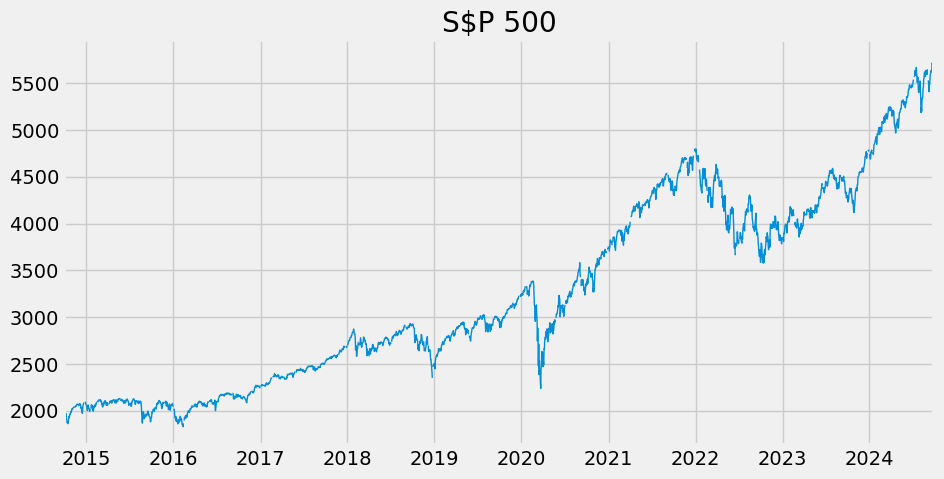

In [280]:
sp500.plot(figsize=(10,5), title ="S$P 500", lw=1 )

### 4. Pull and Join Multiplie Data Series

In [282]:
unemp_results= fred.search("unemployment")
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-10-01,2024-10-01,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-10-01,2024-10-01,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-09-06 07:46:18-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-10-01,2024-10-01,Unemployment Level,1948-01-01,2024-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-09-06 07:47:03-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-10-01,2024-10-01,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-10-01,2024-10-01,Continued Claims (Insured Unemployment),1967-01-07,2024-09-14,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-09-26 07:40:04-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2024-10-01,2024-10-01,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2024-10-01,2024-10-01,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2024-10-01,2024-10-01,Unemployment Rate - Married Women,1955-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:22-05:00,9,To obtain estimates of women worker employment...


In [283]:
unrate= fred.get_series("UNRATE")
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-04-01    3.9
2024-05-01    4.0
2024-06-01    4.1
2024-07-01    4.3
2024-08-01    4.2
Length: 920, dtype: float64

In [284]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
          'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
          'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
          'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
          'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
          'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
          'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 
          'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 
          'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 
          'West Virginia', 'Wisconsin', 'Wyoming']

In [285]:
unemp_df = fred.search(" Unemployment rate USA State", filter=("frequency","Monthly"))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df["title"].str.contains("Unemployment Rate")]
unemp_df = unemp_df.loc[unemp_df["title"].str.contains("|".join(states))]
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2024-10-01,2024-10-01,Unemployment Rate in California,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:02-05:00,64,None
TXUR,TXUR,2024-10-01,2024-10-01,Unemployment Rate in Texas,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:03-05:00,56,None
NYUR,NYUR,2024-10-01,2024-10-01,Unemployment Rate in New York,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:03-05:00,53,None
FLUR,FLUR,2024-10-01,2024-10-01,Unemployment Rate in Florida,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:04-05:00,51,None
PAUR,PAUR,2024-10-01,2024-10-01,Unemployment Rate in Pennsylvania,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:05-05:00,44,None
OHUR,OHUR,2024-10-01,2024-10-01,Unemployment Rate in Ohio,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:05-05:00,41,None
MIUR,MIUR,2024-10-01,2024-10-01,Unemployment Rate in Michigan,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:05-05:00,38,None
ALUR,ALUR,2024-10-01,2024-10-01,Unemployment Rate in Alabama,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:06-05:00,38,None
MAUR,MAUR,2024-10-01,2024-10-01,Unemployment Rate in Massachusetts,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-23 09:48:06-05:00,37,None


In [286]:
unemp_df.shape

(50, 15)

In [287]:
all_results= []

for id in unemp_df.index:
    results = fred.get_series(id)
    results = results.to_frame(name=id)
    all_results.append(results)
pd.concat(all_results,axis=1)    

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,INUR,LAUR,HIUR,NDUR,MTUR,MSUR,MEUR,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,6.5,6.3,9.8,3.4,5.8,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,6.3,6.4,9.7,3.5,5.8,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,6.0,6.5,9.4,3.6,5.8,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,4.8,4.7,3.1,3.7,3.6,2.9,2.8,4.6,3.2,3.8,2.7,3.1,4.8,2.6,4.2,4.3,5.1,3.4,3.5,3.4,4.6,2.8,2.8,3.6,4.3,3.1,2.0,3.1,2.8,3.1,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0
2024-05-01,5.2,4.0,4.2,3.3,3.4,4.2,3.9,3.0,3.0,3.6,4.9,4.6,3.2,3.8,3.4,2.9,2.7,4.6,3.4,3.8,2.8,3.0,4.9,2.7,4.2,4.2,5.1,3.4,3.5,3.5,4.5,2.8,2.9,3.7,4.1,3.0,2.0,3.1,2.8,3.0,2.5,4.3,3.3,2.5,4.3,2.9,2.9,3.9,2.1,2.0
2024-06-01,5.2,4.0,4.2,3.3,3.4,4.4,4.1,2.9,3.2,3.6,5.0,4.6,3.3,3.8,3.3,2.9,2.7,4.6,3.6,3.9,2.9,3.0,4.8,2.8,4.1,4.1,5.2,3.3,3.4,3.7,4.5,2.8,3.0,3.8,4.0,2.9,2.1,3.1,2.8,2.8,2.6,3.9,3.4,2.5,4.3,3.0,2.9,4.0,2.1,2.0
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,3.7,5.2,4.7,3.4,3.9,3.4,3.0,2.7,4.7,3.9,4.0,3.2,3.0,4.9,2.8,4.1,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,4.0,3.9,2.9,2.2,3.1,2.7,2.8,2.6,3.6,3.5,2.5,4.5,3.2,2.9,4.1,2.1,2.0


In [288]:
unemp_results = pd.concat(all_results,axis=1)
unemp_results

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,INUR,LAUR,HIUR,NDUR,MTUR,MSUR,MEUR,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,6.5,6.3,9.8,3.4,5.8,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,6.3,6.4,9.7,3.5,5.8,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,6.0,6.5,9.4,3.6,5.8,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,4.8,4.7,3.1,3.7,3.6,2.9,2.8,4.6,3.2,3.8,2.7,3.1,4.8,2.6,4.2,4.3,5.1,3.4,3.5,3.4,4.6,2.8,2.8,3.6,4.3,3.1,2.0,3.1,2.8,3.1,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0
2024-05-01,5.2,4.0,4.2,3.3,3.4,4.2,3.9,3.0,3.0,3.6,4.9,4.6,3.2,3.8,3.4,2.9,2.7,4.6,3.4,3.8,2.8,3.0,4.9,2.7,4.2,4.2,5.1,3.4,3.5,3.5,4.5,2.8,2.9,3.7,4.1,3.0,2.0,3.1,2.8,3.0,2.5,4.3,3.3,2.5,4.3,2.9,2.9,3.9,2.1,2.0
2024-06-01,5.2,4.0,4.2,3.3,3.4,4.4,4.1,2.9,3.2,3.6,5.0,4.6,3.3,3.8,3.3,2.9,2.7,4.6,3.6,3.9,2.9,3.0,4.8,2.8,4.1,4.1,5.2,3.3,3.4,3.7,4.5,2.8,3.0,3.8,4.0,2.9,2.1,3.1,2.8,2.8,2.6,3.9,3.4,2.5,4.3,3.0,2.9,4.0,2.1,2.0
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,3.7,5.2,4.7,3.4,3.9,3.4,3.0,2.7,4.7,3.9,4.0,3.2,3.0,4.9,2.8,4.1,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,4.0,3.9,2.9,2.2,3.1,2.7,2.8,2.6,3.6,3.5,2.5,4.5,3.2,2.9,4.1,2.1,2.0


<Axes: >

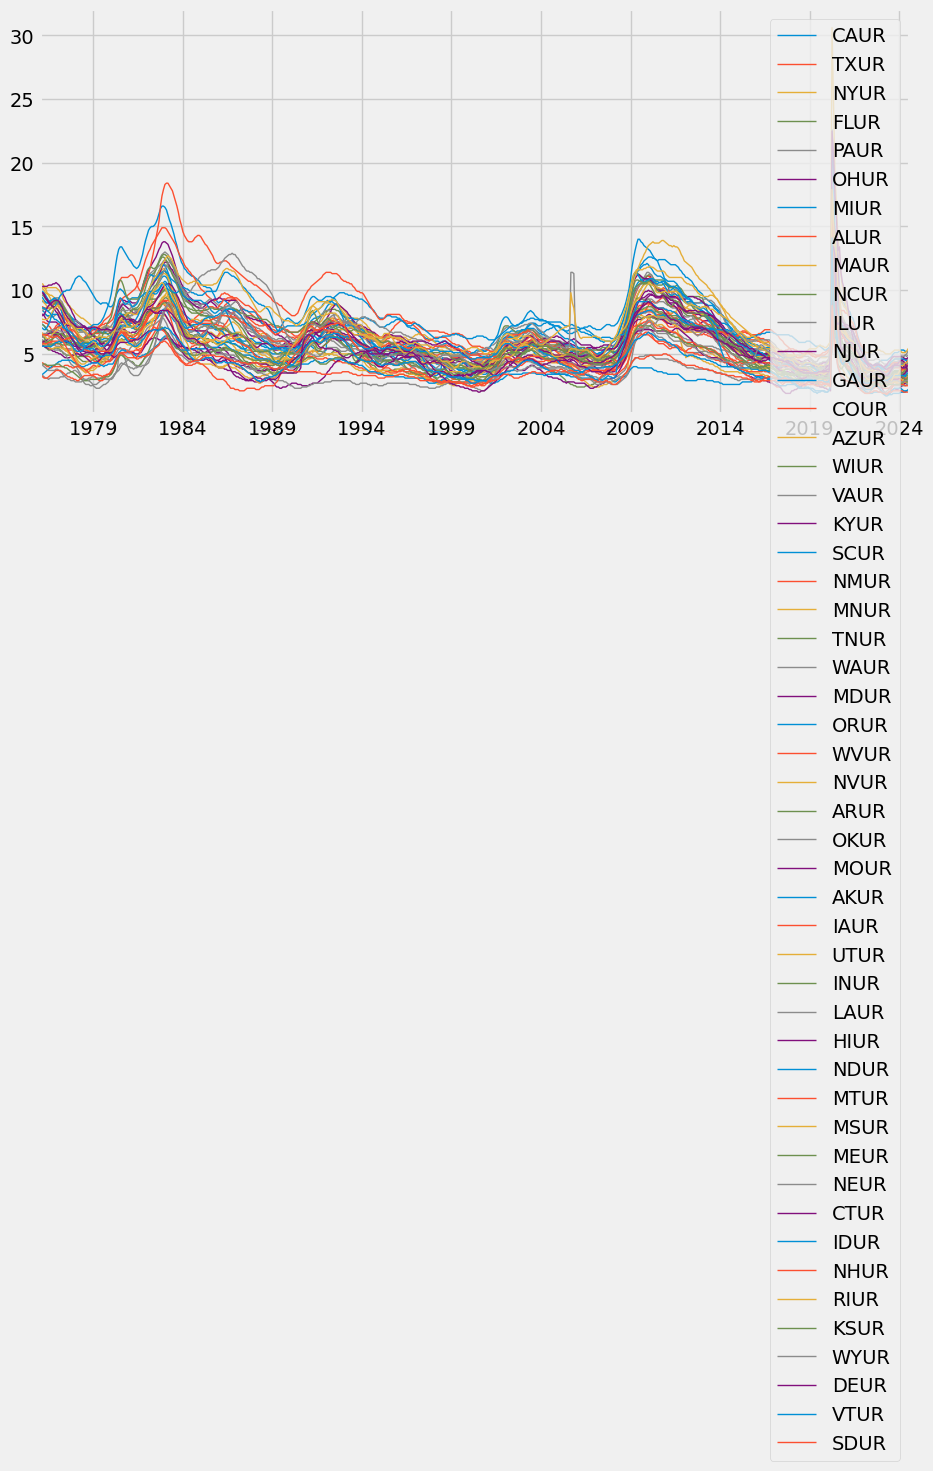

In [289]:
# Plot States Unemployment Rate
unemp_results.plot(figsize=(10,5),lw=1)

### Pull August 2024 Unemployment Rate per State

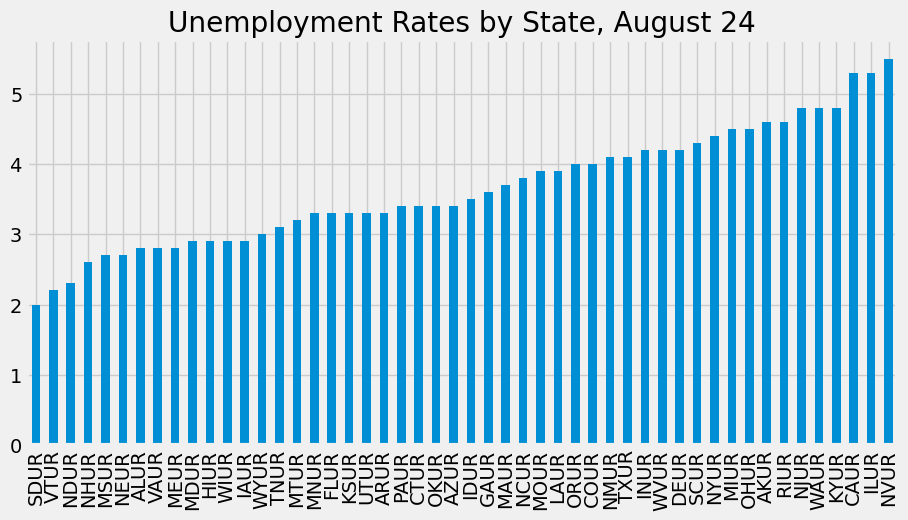

In [291]:
ax = unemp_results.loc[unemp_results.index == "2024-08-01"].T.sort_values("2024-08-01").plot(kind="bar",figsize=(10,5), width=0.5,title="Unemployment Rates by State, August 24")
ax.legend().remove()
plt.show()

### 5. Pull Participation Rate

In [328]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
          'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
          'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
          'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
          'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
          'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
          'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 
          'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 
          'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 
          'West Virginia', 'Wisconsin', 'Wyoming']

In [330]:
part_df = fred.search("participation rate state", filter=("frequency","Monthly"))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df["title"].str.contains("Participation Rate")]
part_df = part_df.loc[part_df["title"].str.contains("|".join(states))]
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2024-10-01,2024-10-01,Labor Force Participation Rate for California,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:05-05:00,21,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2024-10-01,2024-10-01,Labor Force Participation Rate for Alabama,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:07-05:00,13,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2024-10-01,2024-10-01,Labor Force Participation Rate for New York,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:03-05:00,23,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2024-10-01,2024-10-01,Labor Force Participation Rate for Michigan,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:03-05:00,22,A state's labor-force participation rate is th...
LBSSA28,LBSSA28,2024-10-01,2024-10-01,Labor Force Participation Rate for Mississippi,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:02-05:00,21,A state's labor-force participation rate is th...
LBSSA48,LBSSA48,2024-10-01,2024-10-01,Labor Force Participation Rate for Texas,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:05-05:00,20,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2024-10-01,2024-10-01,Labor Force Participation Rate for Florida,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:03-05:00,20,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2024-10-01,2024-10-01,Labor Force Participation Rate for Kentucky,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:03-05:00,20,A state's labor-force participation rate is th...
LBSSA39,LBSSA39,2024-10-01,2024-10-01,Labor Force Participation Rate for Ohio,1976-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-20 09:01:09-05:00,14,A state's labor-force participation rate is th...


In [334]:
part_df.shape

(50, 15)

In [340]:
all_results2= []

for id in part_df.index:
    results = fred.get_series(id)
    results = results.to_frame(name=id)
    all_results2.append(results)

In [342]:
part_results = pd.concat(all_results,axis=1)
part_results

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,INUR,LAUR,HIUR,NDUR,MTUR,MSUR,MEUR,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,6.5,6.3,9.8,3.4,5.8,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,6.3,6.4,9.7,3.5,5.8,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,6.0,6.5,9.4,3.6,5.8,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,4.8,4.7,3.1,3.7,3.6,2.9,2.8,4.6,3.2,3.8,2.7,3.1,4.8,2.6,4.2,4.3,5.1,3.4,3.5,3.4,4.6,2.8,2.8,3.6,4.3,3.1,2.0,3.1,2.8,3.1,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0
2024-05-01,5.2,4.0,4.2,3.3,3.4,4.2,3.9,3.0,3.0,3.6,4.9,4.6,3.2,3.8,3.4,2.9,2.7,4.6,3.4,3.8,2.8,3.0,4.9,2.7,4.2,4.2,5.1,3.4,3.5,3.5,4.5,2.8,2.9,3.7,4.1,3.0,2.0,3.1,2.8,3.0,2.5,4.3,3.3,2.5,4.3,2.9,2.9,3.9,2.1,2.0
2024-06-01,5.2,4.0,4.2,3.3,3.4,4.4,4.1,2.9,3.2,3.6,5.0,4.6,3.3,3.8,3.3,2.9,2.7,4.6,3.6,3.9,2.9,3.0,4.8,2.8,4.1,4.1,5.2,3.3,3.4,3.7,4.5,2.8,3.0,3.8,4.0,2.9,2.1,3.1,2.8,2.8,2.6,3.9,3.4,2.5,4.3,3.0,2.9,4.0,2.1,2.0
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,3.7,5.2,4.7,3.4,3.9,3.4,3.0,2.7,4.7,3.9,4.0,3.2,3.0,4.9,2.8,4.1,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,4.0,3.9,2.9,2.2,3.1,2.7,2.8,2.6,3.6,3.5,2.5,4.5,3.2,2.9,4.1,2.1,2.0


<Axes: >

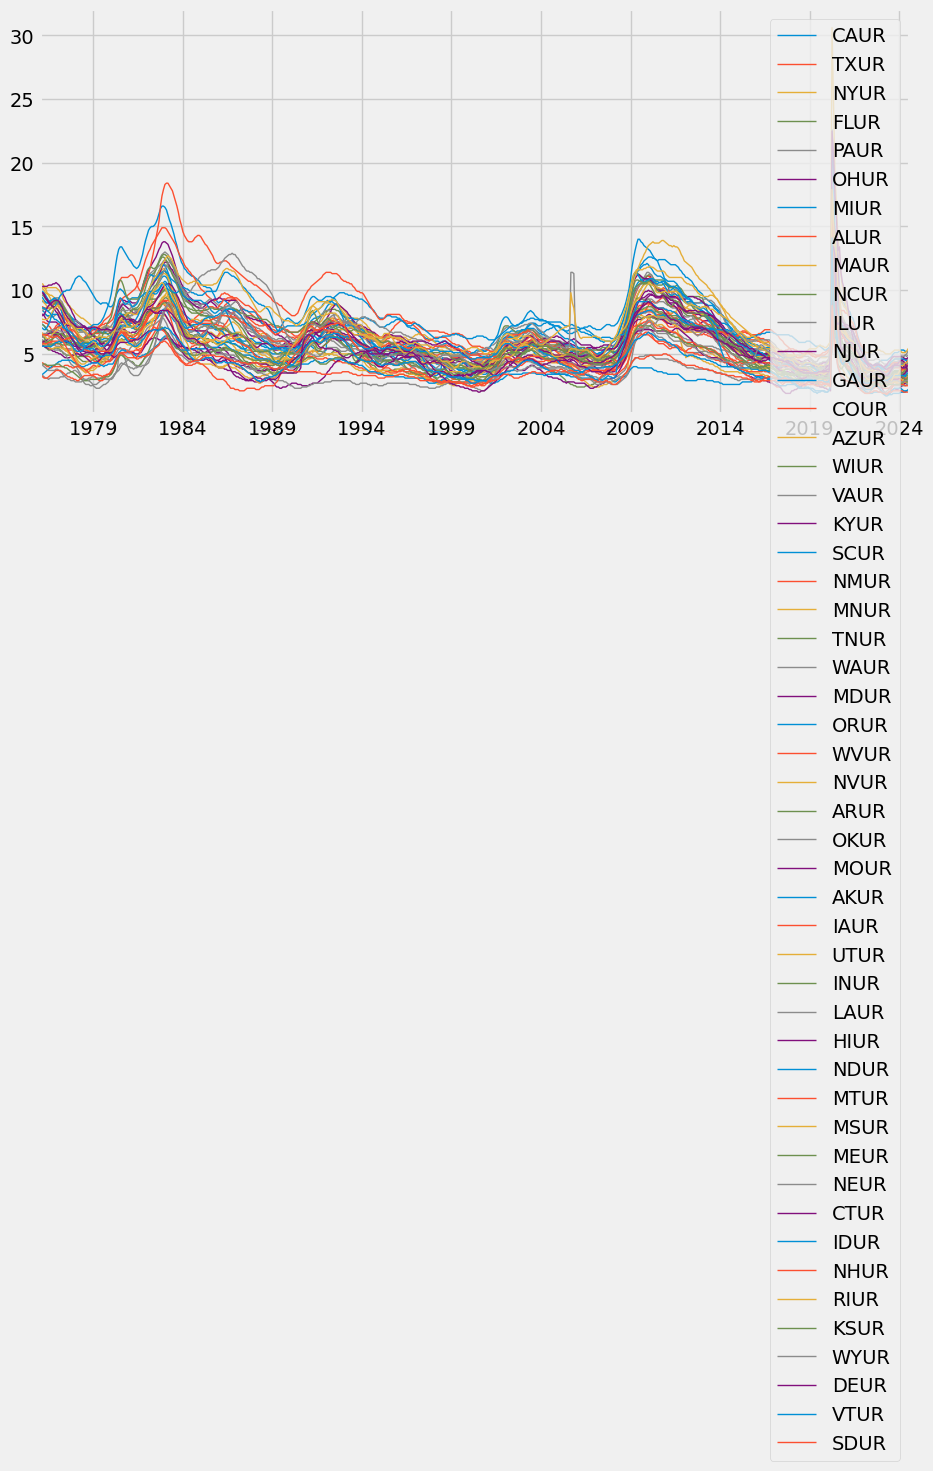

In [346]:
part_results.plot(figsize=(10,5),lw=1)